<a href="https://colab.research.google.com/github/samalasaikumar/Customer_payment_analysis/blob/main/Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET OVERVIEW

In [1]:
# import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset.
df=pd.read_excel("C:\\Users\\abc\\Desktop\\globalterrorismdb_0718dist.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# number of rows and columns in the datatset.
df.shape

(181691, 135)

In [ ]:
# names of all the columns.
for n in df.columns:
    print(n)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [ ]:
# datatypes of all the columns.
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
# general inforamtion about the columns.
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# DATA CLEANING

In [ ]:
# extract only required columns from the original dataset.
df=df[['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','gname','nkill']]
df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [ ]:
# name of all the columns.
for n in df.columns:
    print(n)

iyear
country_txt
region_txt
city
attacktype1_txt
targtype1_txt
gname
nkill


In [ ]:
# change the name of the columns.
df.rename(columns = {'iyear':'year', 'country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'target','gname':'organization','nkill':'killed'}, inplace = True)

In [ ]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [ ]:
# sum of all null values in the columns.
df.isnull().sum()

year                0
country             0
region              0
city              434
attacktype          0
target              0
organization        0
killed          10313
dtype: int64

In [ ]:
# drop all rows which have null values.
df = df.dropna()

In [ ]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0.0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0.0


In [ ]:
# sum of all null values in the columns.
df.isnull().sum()

year            0
country         0
region          0
city            0
attacktype      0
target          0
organization    0
killed          0
dtype: int64

In [ ]:
# datatype of all the columns.
df.dtypes

year              int64
country          object
region           object
city             object
attacktype       object
target           object
organization     object
killed          float64
dtype: object

In [ ]:
# sort the dataset in descending order of the killed column.
df.sort_values(by=['killed'],ascending=False).head(10)

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570.0
73126,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1384.0
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383.0
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180.0
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953.0
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588.0
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0
136746,2014,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517.0
170198,2016,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),433.0


In [ ]:
# drop row number 73126.
df=df.drop([73126])

In [ ]:
# sort the dataset in descending order of the killed column.
df.sort_values(by=['killed'],ascending=False).head(10)

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570.0
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383.0
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180.0
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953.0
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588.0
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0
136746,2014,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517.0
170198,2016,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),433.0
6629,1978,Iran,Middle East & North Africa,Abadan,Facility/Infrastructure Attack,Business,Mujahedin-e Khalq (MEK),422.0


In [ ]:
# change datatype of killed column from float to int.
df=df.astype({'killed':'int'})

In [ ]:
# datatypes of all the columns.
df.dtypes

year             int64
country         object
region          object
city            object
attacktype      object
target          object
organization    object
killed           int32
dtype: object

In [ ]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0


In [ ]:
# number of rows and columns in the dataset.
df.shape

(170943, 8)

In [ ]:
# basic information about the dataset.
df.describe()

,year,killed
count,170943.000000,170943.000000
mean,2003.066537,2.397928
std,12.956648,11.066324
min,1970.000000,0.000000
25%,1991.000000,0.000000
50%,2009.000000,0.000000
75%,2014.000000,2.000000
max,2017.000000,1570.000000


# Number Of Terrorist Activities Each Year

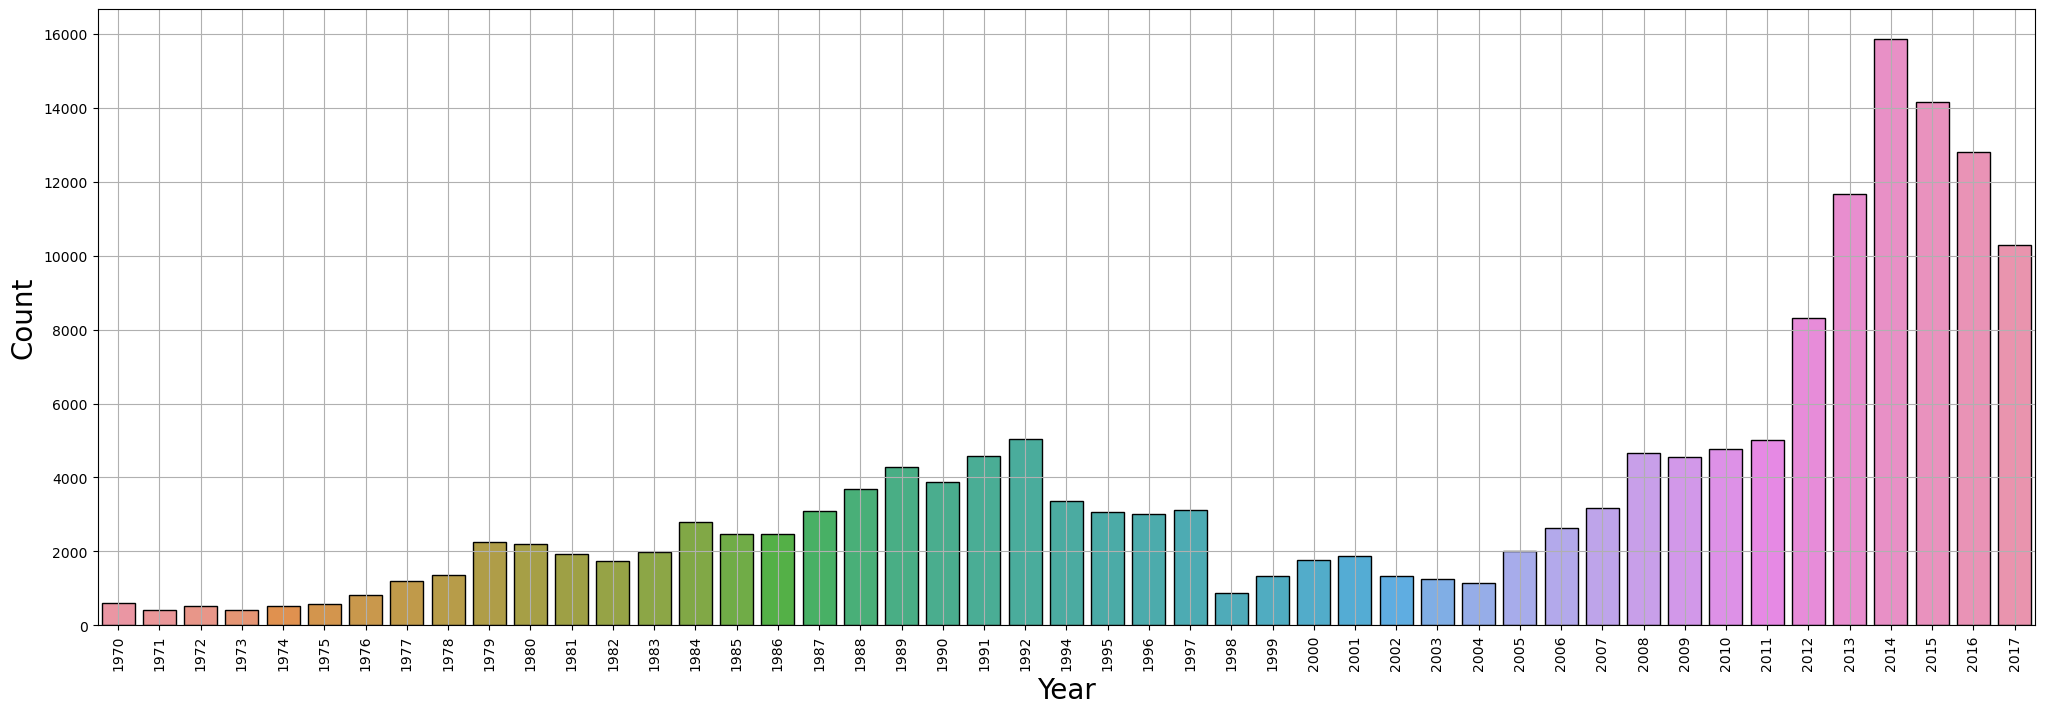

In [ ]:
# year wise terrorist attack.
plt.subplots(figsize=(25,8))
sns.countplot(x='year', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

From the above we can say that, 2014 was the deadliest year, where the maximum number of attacks takes place.

# Terrorist Activities by Region in each Year

In [ ]:
# extract year column of the dataset.
df.year

0         1970
1         1970
2         1970
5         1970
6         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 170943, dtype: int64

In [ ]:
# extract region column of the datatset.
df.region

0         Central America & Caribbean
1                       North America
2                      Southeast Asia
5                       North America
6                       South America
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: region, Length: 170943, dtype: object

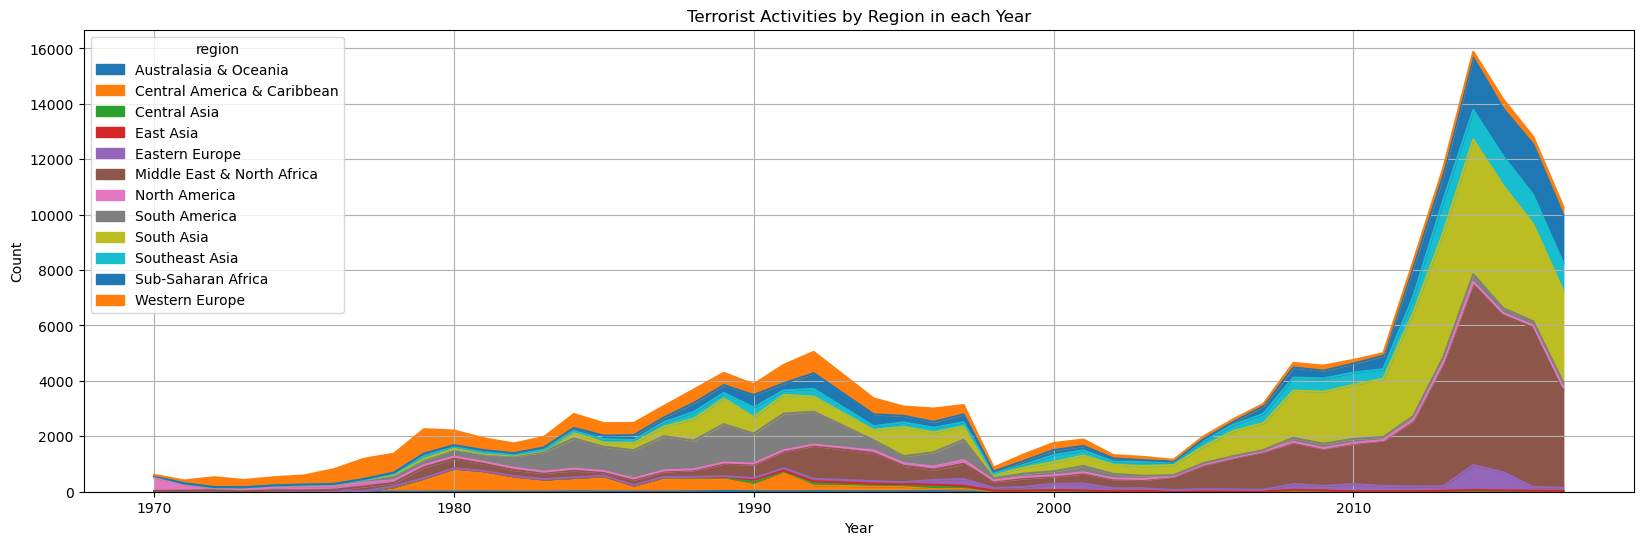

In [ ]:
# region wise and year wise terrorist attcks visualization.
pd.crosstab(df.year,df.region).plot(kind='area',figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region in each Year')
plt.grid(True)
plt.show()

From the above we can say that, after 2010 there is huge growth in the terrorist attacks in almost all regions of the world.

In [ ]:
# create a dataset r_type.
r_type=df.region.value_counts().to_frame().reset_index()
r_type

,index,region
0,Middle East & North Africa,48171
1,South Asia,43887
2,South America,17306
3,Sub-Saharan Africa,15937
4,Western Europe,15727
5,Southeast Asia,11961
6,Central America & Caribbean,8022
7,Eastern Europe,4973
8,North America,3362
9,East Asia,763


In [ ]:
# change the name of the columns of the d_type dataset.
r_type.columns=['region_name','count']

In [ ]:
# dataset r_type.
r_type

,region_name,count
0,Middle East & North Africa,48171
1,South Asia,43887
2,South America,17306
3,Sub-Saharan Africa,15937
4,Western Europe,15727
5,Southeast Asia,11961
6,Central America & Caribbean,8022
7,Eastern Europe,4973
8,North America,3362
9,East Asia,763


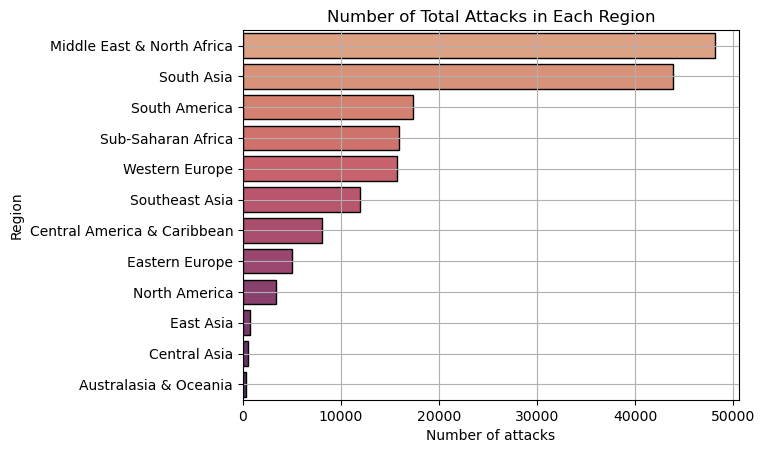

In [ ]:
# total number of terrorist attacks in various regions of the world.
sns.barplot(y='region_name',x='count',data=r_type,orient='h',palette='flare',ec='black')
plt.grid(True)
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')
plt.show()

From the above we can say that, Middle East & North Africa and South Asia has the highest number of attacks among all regions in the world.

# Total number of attacks of each country

In [ ]:
# create a datset top_1o_country.
top_10_country=df.country.value_counts()[:10].to_frame().reset_index()
top_10_country

,index,country
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


In [ ]:
# change the name of the column of the dataset.
top_10_country.columns=['country_name','count']

In [ ]:
# dataset top_10_country.
top_10_country

,country_name,count
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


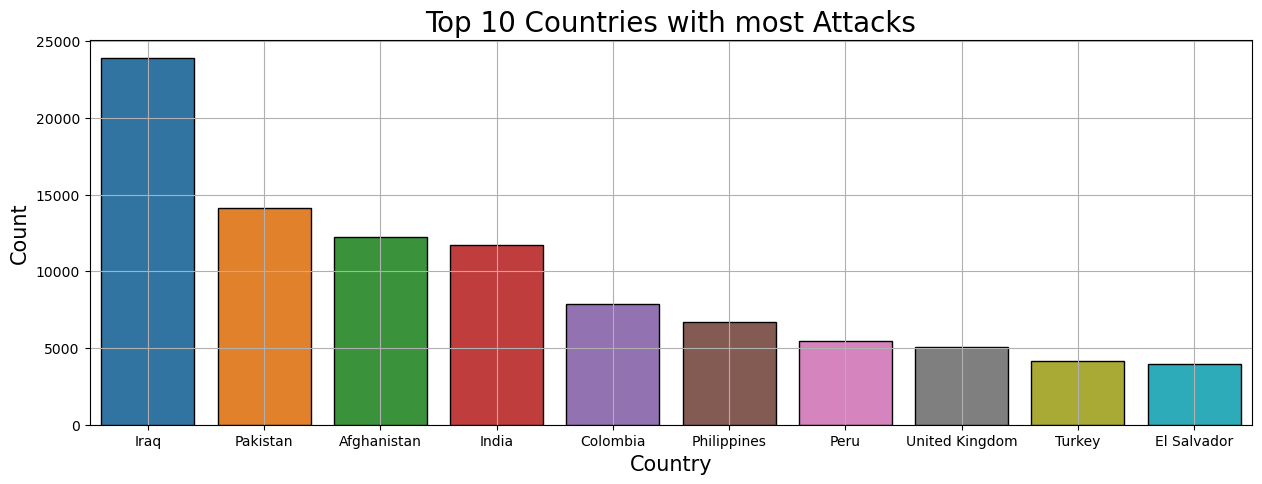

In [ ]:
# bar-plot for top 10 countries which are most affected by terrorism.
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_country,x='country_name',y='count',ec='black',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with most Attacks',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

From the above we can say that, Iraq is the most affected country from the terrorism.

# Target Methods by Terrorists

In [ ]:
# create a dataframe t_type.
t_type=df.attacktype.value_counts()[0:10].to_frame().reset_index()
t_type

,index,attacktype
0,Bombing/Explosion,84199
1,Armed Assault,40129
2,Assassination,19206
3,Facility/Infrastructure Attack,9774
4,Hostage Taking (Kidnapping),8585
5,Unknown,6549
6,Unarmed Assault,998
7,Hostage Taking (Barricade Incident),898
8,Hijacking,605


In [ ]:
# change the column name of the t_type dataset.
t_type.columns=['target_type','count']

In [ ]:
# datatset t_type.
t_type

,target_type,count
0,Bombing/Explosion,84199
1,Armed Assault,40129
2,Assassination,19206
3,Facility/Infrastructure Attack,9774
4,Hostage Taking (Kidnapping),8585
5,Unknown,6549
6,Unarmed Assault,998
7,Hostage Taking (Barricade Incident),898
8,Hijacking,605


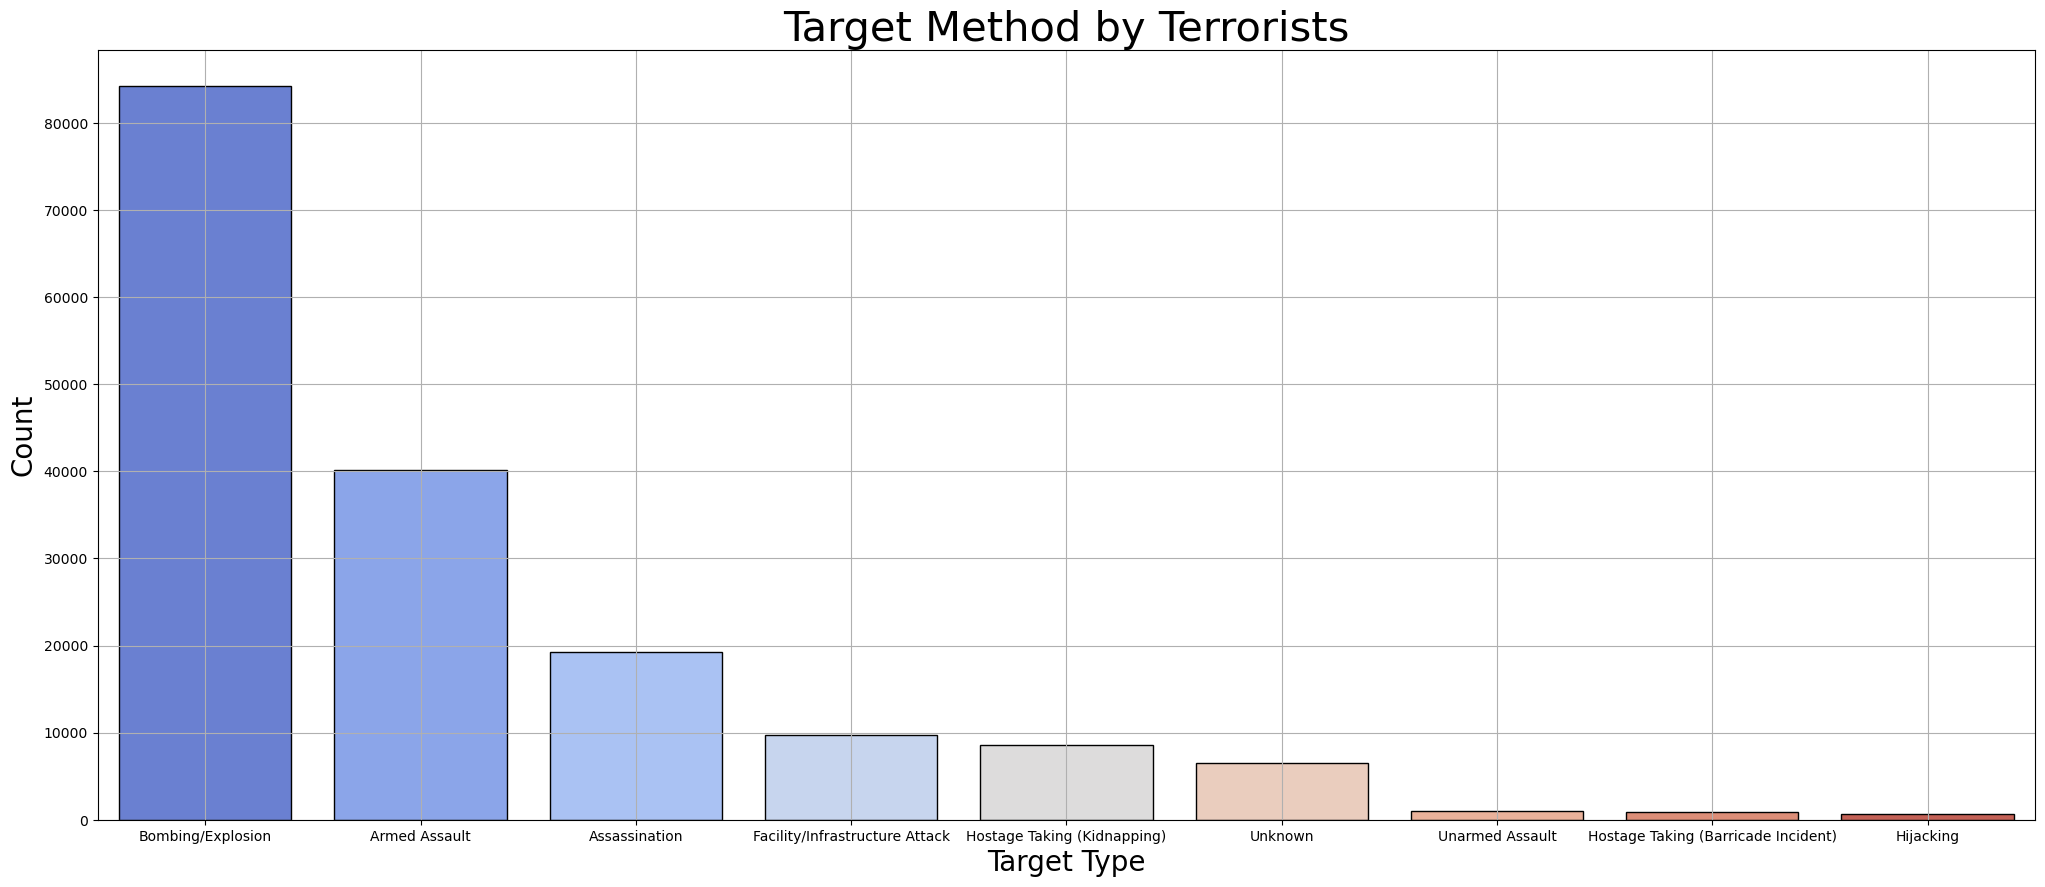

In [ ]:
# bar-plot to show which method is most used by terrorist to attack.
plt.figure(figsize=(25,10))
sns.barplot(x='target_type',y='count',data=t_type,palette='coolwarm',ec='black')
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Target Method by Terrorists",fontsize=30)
plt.grid(True)

From the above we can say that, terrorist used Bombing/Explosion as a target method most number of times.

# Most active terrorist group in the world

In [ ]:
# create a dataset g_type.
g_type = df.organization.value_counts()[:5].to_frame().reset_index()
g_type

,index,organization
0,Unknown,79199
1,Taliban,7125
2,Islamic State of Iraq and the Levant (ISIL),5066
3,Shining Path (SL),4078
4,New People's Army (NPA),2693


In [ ]:
# change the name of the column of the g_type dataset.
g_type.columns=['organization_name','count']

In [ ]:
# dataset g_type.
g_type

,organization_name,count
0,Unknown,79199
1,Taliban,7125
2,Islamic State of Iraq and the Levant (ISIL),5066
3,Shining Path (SL),4078
4,New People's Army (NPA),2693


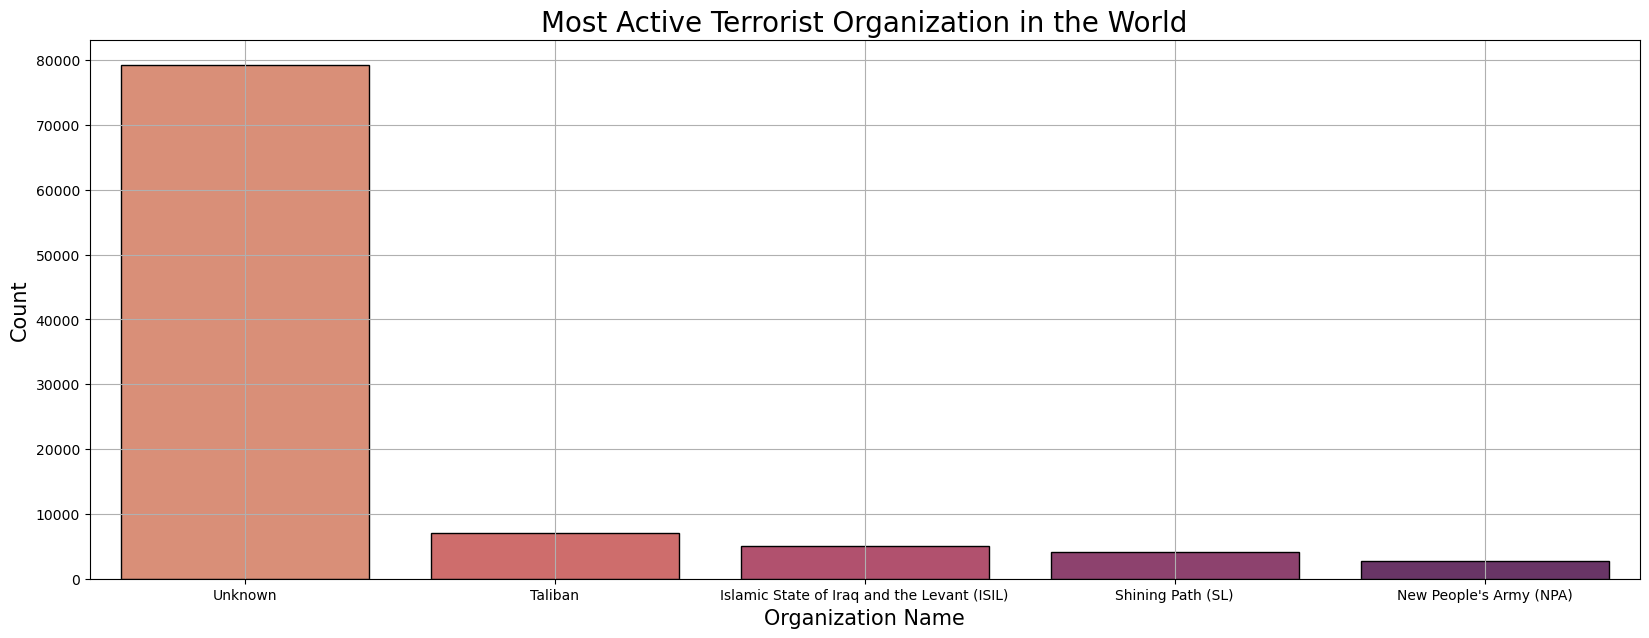

In [ ]:
# bar-plot for the most active terrorist organization in the world.
plt.figure(figsize=(20,7))
sns.barplot(x='organization_name',y='count',data=g_type,ec='black',palette='flare')
plt.title('Most Active Terrorist Organization in the World',fontsize=20)
plt.xlabel('Organization Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(True)

From the above we can say that, Taliban is the most active terrorist organization in the world.

# Number of Total Casualities in Each Country

In [ ]:
# create a dataset top10_c.
top10_c=df.groupby('country').killed.sum().to_frame().reset_index().sort_values('killed',ascending=False)[0:10]
top10_c

,country,killed
81,Iraq,78567
0,Afghanistan,39137
131,Pakistan,23811
127,Nigeria,22682
77,India,19341
164,Sri Lanka,15530
172,Syria,15205
33,Colombia,14698
136,Peru,12771
50,El Salvador,12053


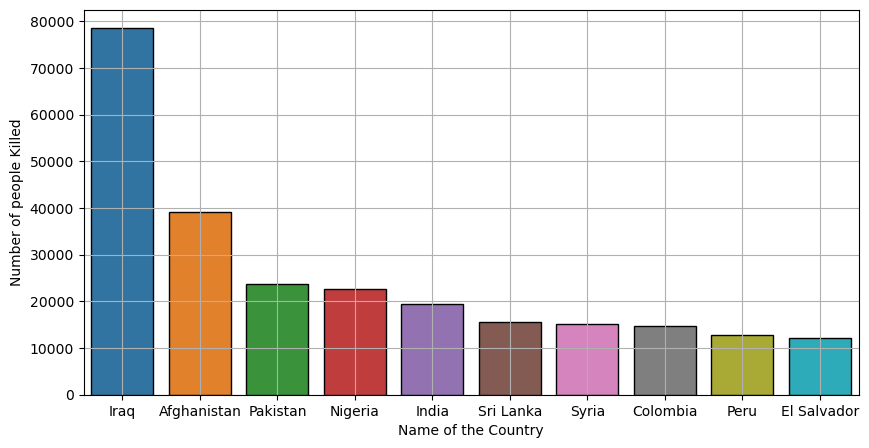

In [ ]:
# bar-plot for top 10 countries where most number of people killed from the terrorism.
plt.figure(figsize=(10,5))
sns.barplot(y='killed',x='country',data=top10_c,ec='black')
plt.xlabel('Name of the Country')
plt.ylabel('Number of people Killed')
plt.grid(True)
plt.show(True)

From the above we can say that, Iraq is that country where terrorists killed most number of people.

# City where terrorist killed most number of people in the world ?

In [ ]:
# create a dataset top10_city.
top10_city=df.city.value_counts().to_frame()[0:10].reset_index()
top10_city

,index,city
0,Unknown,8986
1,Baghdad,7497
2,Karachi,2635
3,Mosul,2165
4,Lima,2132
5,Belfast,2129
6,Mogadishu,1438
7,Santiago,1357
8,San Salvador,1263
9,Istanbul,1016


In [ ]:
# rename the name of the column of the dataset.
top10_city.columns=['city','count']

In [ ]:
# dataset top10_city.
top10_city

,city,count
0,Unknown,8986
1,Baghdad,7497
2,Karachi,2635
3,Mosul,2165
4,Lima,2132
5,Belfast,2129
6,Mogadishu,1438
7,Santiago,1357
8,San Salvador,1263
9,Istanbul,1016


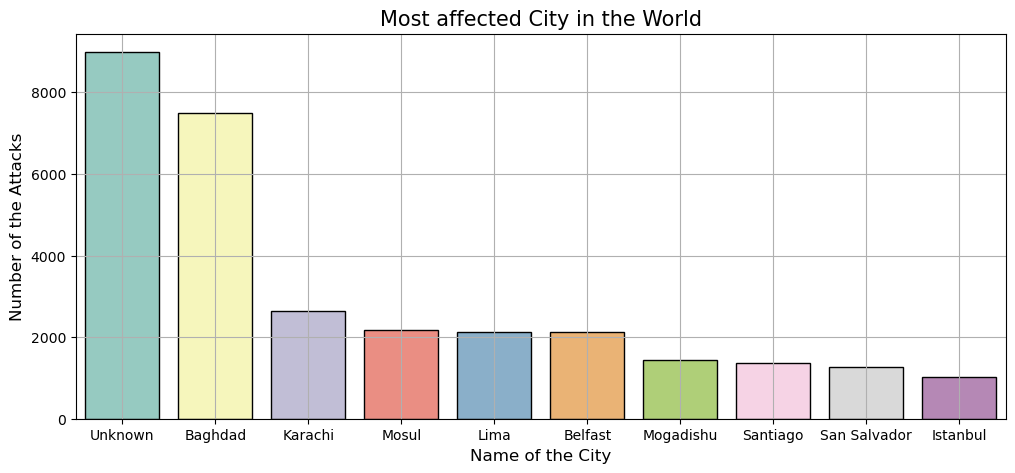

In [ ]:
# Bar-plot for top 10 most affected city from terrorism in the world.
plt.figure(figsize=(12,5))
sns.barplot(x='city',y='count',data=top10_city,ec='black',palette='Set3')
plt.title("Most affected City in the World",fontsize=15)
plt.xlabel('Name of the City',fontsize=12)
plt.ylabel("Number of the Attacks",fontsize=12)
plt.grid(True)
plt.show()

From the above we can say that, Baghdad is the most affected city in the world from terrorism.

# Time Line of number of people kiled in Nort America because of Terrorism

In [ ]:
# create a dataset a.
a=df[df['region']=='North America']
a.head()

,year,country,region,city,attacktype,target,organization,killed
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
7,1970,United States,North America,Oakland,Bombing/Explosion,Utilities,Unknown,0
8,1970,United States,North America,Madison,Facility/Infrastructure Attack,Military,New Year's Gang,0
9,1970,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),New Year's Gang,0


In [ ]:
# create a datset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Canada,1970,2
1,Canada,1972,4
2,Canada,1974,1
3,Canada,1980,3
4,Canada,1982,4
...,...,...,...
115,United States,2013,20
116,United States,2014,29
117,United States,2015,38
118,United States,2016,64


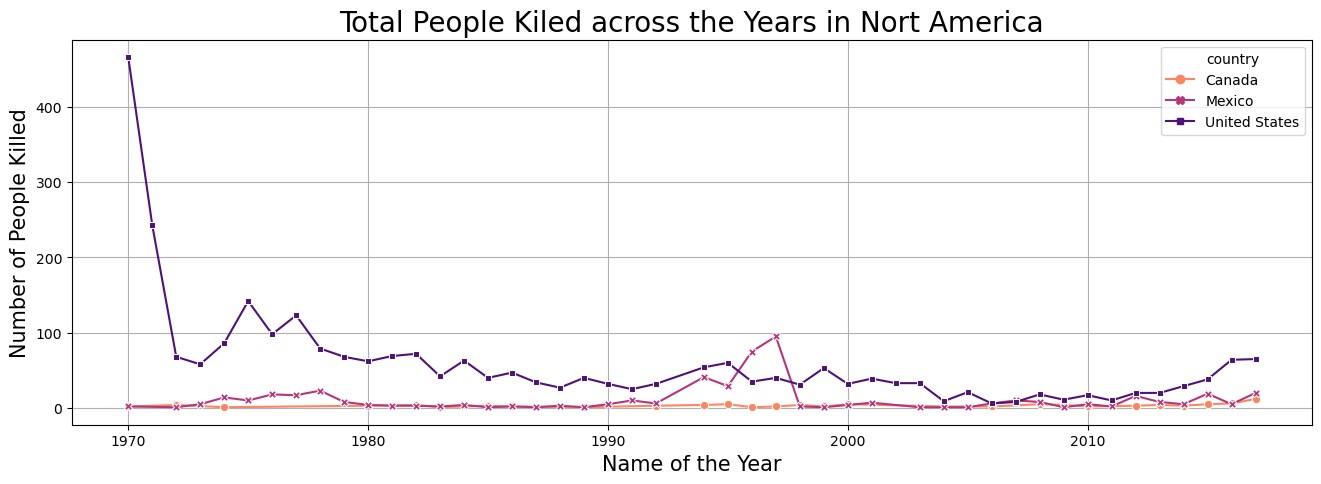

In [ ]:
# LinePlot which compare the number of people killed in North American Countries.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Nort America",fontsize=20)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.grid(True)
plt.show()

From the above we can say that, around 1970 terrorist killed most number of people in Nort America.But it very good to see that the number of people dying from terrorist attacks in Nort America are decreasing after 1970.It may be beacuse of the increasing security measures in the Nort America.

# Time Line of number of people kiled in Pakistan, Afghanistan and India because of Terrorism

In [ ]:
# value counts of the column region of the dataset df.
df.region.value_counts()

Middle East & North Africa     48171
South Asia                     43887
South America                  17306
Sub-Saharan Africa             15937
Western Europe                 15727
Southeast Asia                 11961
Central America & Caribbean     8022
Eastern Europe                  4973
North America                   3362
East Asia                        763
Central Asia                     558
Australasia & Oceania            276
Name: region, dtype: int64

In [ ]:
# create a dataset a.
a=df[df['region']=='South Asia']
a.head()

,year,country,region,city,attacktype,target,organization,killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0


In [ ]:
# value counts of the country column of the dataset a.
a.country.value_counts()

Pakistan       14108
Afghanistan    12223
India          11740
Sri Lanka       2971
Bangladesh      1622
Nepal           1195
Maldives          21
Bhutan             5
Mauritius          2
Name: country, dtype: int64

In [ ]:
# create a dataset a.
a=a[(a.country=='Pakistan') | (a.country=='Afghanistan') | (a.country=='India')]
a.head()

,year,country,region,city,attacktype,target,organization,killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0


In [ ]:
# create a dataset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
...,...,...,...
112,Pakistan,2013,2160
113,Pakistan,2014,2106
114,Pakistan,2015,1210
115,Pakistan,2016,844


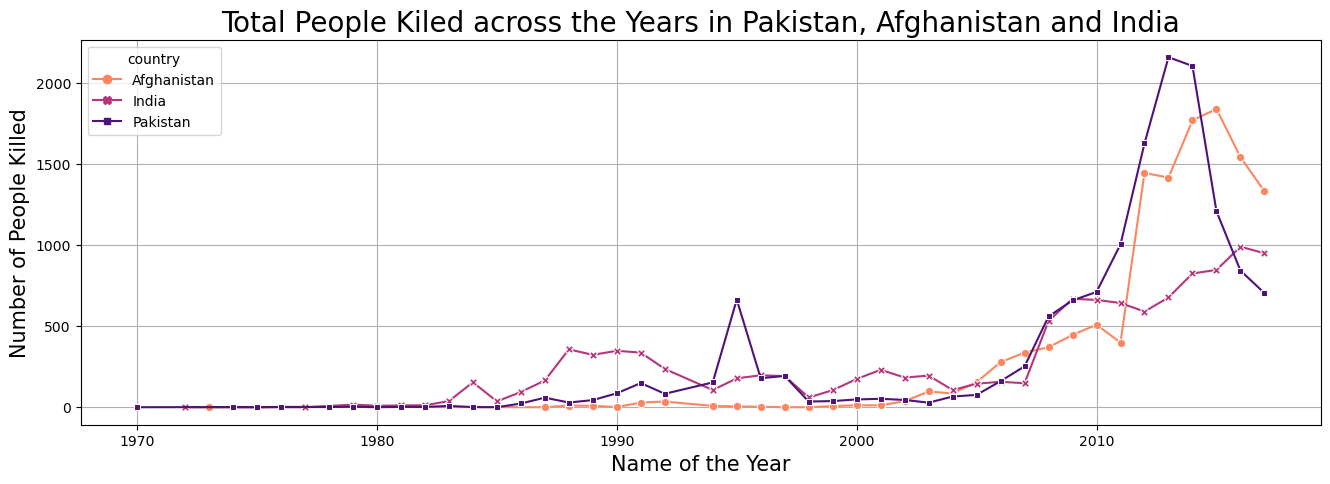

In [ ]:
# LinePlot which compare the number of people killed in Pakistan, Afghanistan and India.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Pakistan, Afghanistan and India",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

From the above graph we can say that, in Pakistan, Afghanistan and India the graph of number of people killed by terrorism increases after 2010.

# Time Line of number of people kiled in Iraq and Syrai because of Terrorism

In [ ]:
# create a dataset a.
a=df[(df.country=='Iraq') | (df.country=='Syria') ]
a.head()

,year,country,region,city,attacktype,target,organization,killed
2512,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Arab Communist Organization,0
2540,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Arab Communist Organization,0
2590,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Business,Arab Communist Organization,1
2595,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Business,Arab Communist Organization,0
2751,1975,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,0


In [ ]:
# create a dataset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Iraq,1975,1
1,Iraq,1976,3
2,Iraq,1979,1
3,Iraq,1980,6
4,Iraq,1982,2
...,...,...,...
56,Syria,2013,269
57,Syria,2014,286
58,Syria,2015,427
59,Syria,2016,412


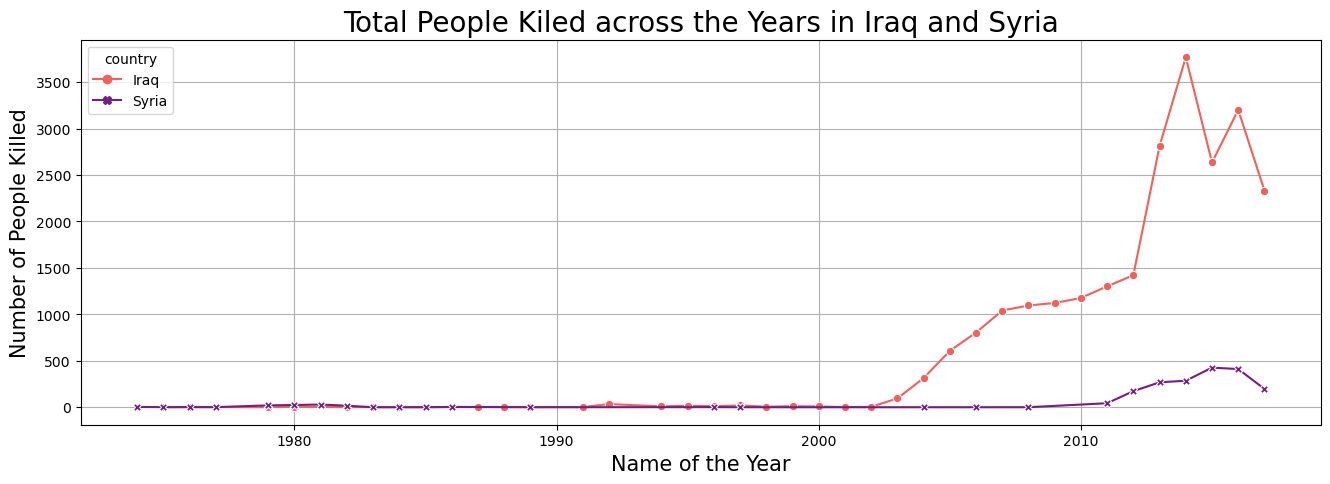

In [ ]:
# LinePlot which compare the number of people killed in Iraq and Syria.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Iraq and Syria",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

From the above we can say that, there was negligible people killed in the terrorism before 2000 in Iraq and before 2010 in Syria.But it is ver sad to know that after 2000 the graph of the people killed by terrorism in Iraq is increased at very higher rates.The US invasion of Iraq may be one of major reason of increasing terrorism In Iraq.

# In which year the most number of Iraqis died beause of terrorism and which organization is responsible for it ?

In [ ]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0


In [ ]:
# create a dataset iraq_year_dead.
iraq_year_dead=df[df['country']=='Iraq'].sort_values(by=['killed'],ascending=False)
iraq_year_dead.head()

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
136561,2014,Iraq,Middle East & North Africa,Kojo,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),400
164327,2016,Iraq,Middle East & North Africa,Baghdad,Bombing/Explosion,Business,Islamic State of Iraq and the Levant (ISIL),383


In [ ]:
# value counts of the year column of the iraq_year_dead dataset.
iraq_year_dead.year.value_counts()

2014    3768
2016    3201
2013    2812
2015    2635
2017    2333
2012    1422
2011    1302
2010    1177
2009    1123
2008    1096
2007    1042
2006     805
2005     608
2004     315
2003      96
1992      35
1997      20
1995      17
1996      12
1999      12
1994      10
2000       9
1998       7
1980       6
2002       5
1988       4
1976       3
2001       3
1991       3
1987       3
1989       3
1982       2
1983       2
1984       2
1979       1
1975       1
Name: year, dtype: int64

In [ ]:
# create a dataset iraq_year_dead.
iraq_year_dead=iraq_year_dead[iraq_year_dead['year']==2014]
iraq_year_dead

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
136561,2014,Iraq,Middle East & North Africa,Kojo,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),400
137460,2014,Iraq,Middle East & North Africa,Mosul,Hostage Taking (Kidnapping),Police,Islamic State of Iraq and the Levant (ISIL),150
...,...,...,...,...,...,...,...,...
130622,2014,Iraq,Middle East & North Africa,Mosul,Armed Assault,Military,Unknown,0
130624,2014,Iraq,Middle East & North Africa,Mosul,Bombing/Explosion,Private Citizens & Property,Unknown,0
130675,2014,Iraq,Middle East & North Africa,Baghdad,Bombing/Explosion,Private Citizens & Property,Unknown,0
130690,2014,Iraq,Middle East & North Africa,Adhaim,Bombing/Explosion,Private Citizens & Property,Unknown,0


In [ ]:
# sum of all people killed in 2014.
iraq_year_dead.killed.sum()

13965

In [ ]:
# value counts of the organization column of the iraq_year_dead dataset.
iraq_year_dead['organization'].value_counts()

Unknown                                                  2710
Islamic State of Iraq and the Levant (ISIL)               993
Al-Naqshabandiya Army                                      22
Military Council of the Tribal Revolutionaries (MCTR)      19
Muslim extremists                                          17
Asa'ib Ahl al-Haqq                                          2
Tribesmen                                                   2
Ansar al-Islam                                              1
Mujahedeen Army                                             1
Abu Jaafar al-Mansur Brigades                               1
Name: organization, dtype: int64

In [ ]:
# create a dataset a.
a=iraq_year_dead['organization'].value_counts()[0:5].to_frame().reset_index()
a

,index,organization
0,Unknown,2710
1,Islamic State of Iraq and the Levant (ISIL),993
2,Al-Naqshabandiya Army,22
3,Military Council of the Tribal Revolutionaries...,19
4,Muslim extremists,17


In [ ]:
# rename the column of the dataset a
a.columns=['organization','count']

In [ ]:
# dataset a.
a

,organization,count
0,Unknown,2710
1,Islamic State of Iraq and the Levant (ISIL),993
2,Al-Naqshabandiya Army,22
3,Military Council of the Tribal Revolutionaries...,19
4,Muslim extremists,17


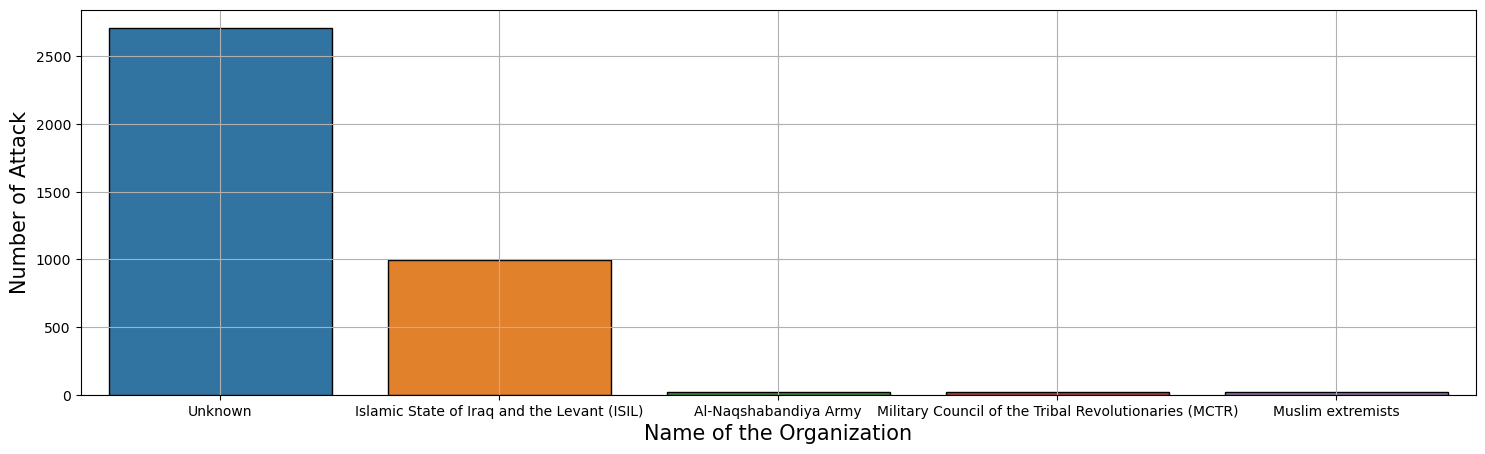

In [ ]:
# bar-plot for top 10 countries which are most affected by terrorism.
plt.figure(figsize=(18,5))
sns.barplot(data=a,x='organization',y='count',ec='black',lw=1)
plt.grid(True)
plt.xlabel('Name of the Organization',fontsize=15)
plt.ylabel('Number of Attack',fontsize=15)
plt.show()

From the above we can say that, in 2014 is the worst year for Iraqis.In the year 2014, 13965 people was killed by terrorism.And if we talk about the organization which is responsible for most number of iraqis death is Islamic State of Iraq and the Levant (ISIL).Islamic State of Iraq and the Levant (ISIL) attacks about more than 1000 times in year 2014.

# Target of the terrorists

In [ ]:
# value counts of the target column of the dataset.
df['target'].value_counts().head()

Private Citizens & Property    40883
Military                       25622
Police                         23713
Government (General)           20282
Business                       19142
Name: target, dtype: int64

In [ ]:
# count of top 5 targets.
list(df['target'].value_counts().head())

[40883, 25622, 23713, 20282, 19142]

In [ ]:
# list of the top 5 target of the terrorists.
list(df['target'].value_counts().head().keys())

['Private Citizens & Property',
 'Military',
 'Police',
 'Government (General)',
 'Business']

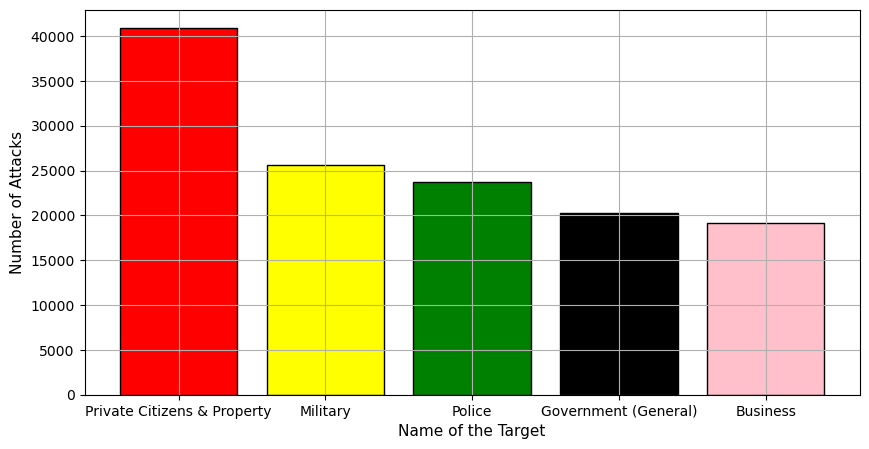

In [ ]:
# Bar-plot of top 5 targets of the terrorists.
plt.figure(figsize=(10,5))
col=['red','yellow','green','black','pink','orange']
plt.bar(list(df['target'].value_counts().head().keys()),list(df['target'].value_counts().head()),color=col,ec='black')
plt.grid(True)
plt.xlabel('Name of the Target',fontsize=11)
plt.ylabel('Number of Attacks',fontsize=11)
plt.show()

From the above we can say that, terrorists target Private Citizens & Property maximum number of times.

# Deadliest year in terms of death of people by terrorism

In [ ]:
# create a year dataset.
year=(df.groupby(['year'])['killed'].size()).reset_index()
year

,year,killed
0,1970,609
1,1971,407
2,1972,524
3,1973,424
4,1974,523
5,1975,587
6,1976,814
7,1977,1189
8,1978,1373
9,1979,2257


In [ ]:
# sort the year dataset in descending order of the killed colum.
year=year.sort_values(by=['killed'],ascending=False).head()
year

,year,killed
43,2014,15881
44,2015,14160
45,2016,12809
42,2013,11685
46,2017,10285


In [ ]:
# list of the top 5 years where maximum people killed by terrorism.
list(year['year'])

[2014, 2015, 2016, 2013, 2017]

In [ ]:
# count of the killed in the top 5 year.
list(year['killed'])

[15881, 14160, 12809, 11685, 10285]

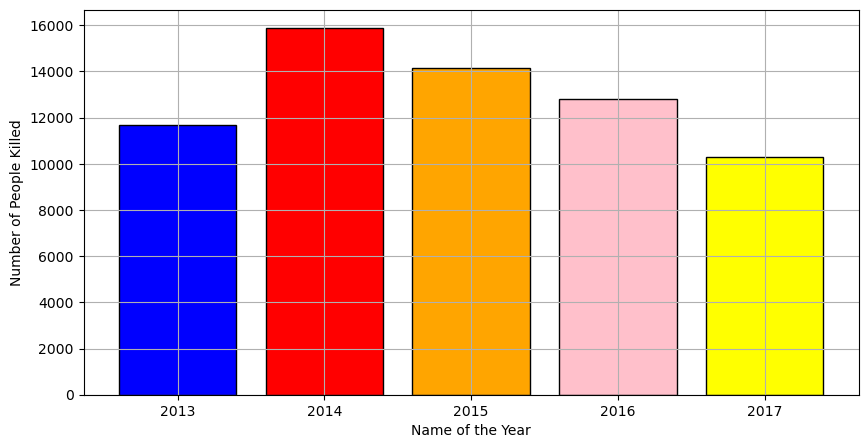

In [ ]:
# bar-plot for top 5 years where maximum number of people killed by terrorism.
plt.figure(figsize=(10,5))
color=['red','orange','pink','blue','yellow']
plt.bar(list(year['year']),list(year['killed']),color=color,ec='black')
plt.grid(True)
plt.xlabel('Name of the Year')
plt.ylabel('Number of People Killed')
plt.show()

From the above we can say that, year 2014 is the deadliest year in the history of terrorism. About 16000 people died in the single year by terrorism.